<a href="https://colab.research.google.com/github/twishi03/Data/blob/main/ChemInformatics_ML_RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#@title **Install Miniconda, RDKit and other libraries**
#@markdown Please execute this cell by pressing the _Play_ button
#@markdown on the left. Installation may take a few minutes.
#@markdown Double click on this text to show/hide the installation script

from IPython.utils import io
import tqdm.notebook

total = 50

with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:

      # install anaconda
      %shell wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
      pbar.update(10)
      %shell chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
      %shell bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
      %shell conda install -c rdkit rdkit -y
      pbar.update(30)

      import sys
      sys.path.append('/usr/local/lib/python3.7/site-packages/')

      # non rdkit installations
      %shell pip install mols2grid
      %shell pip install dtreeviz
      %shell pip install git+https://github.com/PatWalters/clusterama.git #To perform clustering



      pbar.update(10)

  0%|          | 0/50 [00:00<?, ?it/s]

In [78]:
#@title **Install Miniconda, RDKit and other libraries**
#@markdown Please execute this cell by pressing the _Play_ button
#@markdown on the left. Installation may take a few minutes.
#@markdown Double click on this text to show/hide the installation script

from IPython.utils import io
import tqdm.notebook
import os

total = 30

with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:

      # install anaconda
      %shell wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
      pbar.update(10)
      %shell chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
      %shell bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local

      # Create and activate a conda environment
      # Use the 'source' command for activation within the shell
      %shell conda create -n rdkit_env python=3.7 -y
      %shell /usr/local/bin/conda init bash # Initialize conda for bash
      %shell source /usr/local/etc/profile.d/conda.sh && conda activate rdkit_env
      #%shell conda activate rdkit_env

      # Install RDKit within the conda environment
      %shell conda install -c rdkit rdkit -y
      pbar.update(30)

      # Update sys.path after activating the environment
      import sys
      # Use get_ipython().getoutput() and access the output directly
      rdkit_env_path = get_ipython().getoutput("conda info --envs | grep rdkit_env | awk '{print $2}'")[0]
      sys.path.append(os.path.join(rdkit_env_path, 'lib', 'python3.7', 'site-packages')) # Corrected and more robust path

      # non rdkit installations
      %shell pip install mols2grid
      %shell pip install dtreeviz
      %shell pip install git+https://github.com/PatWalters/clusterama.git #To perform clustering

      pbar.update(10)

  0%|          | 0/30 [00:00<?, ?it/s]

## 1. **Simple RDKit functions**

Create a molecule (benzene) from a SMILES string

In [79]:
!pip install RDKit

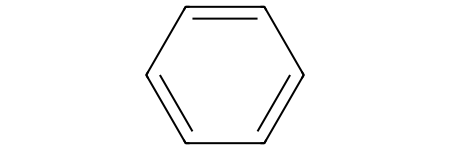

In [80]:
from rdkit import Chem # Import the Chem module from RDKit

mol = Chem.MolFromSmiles("c1ccccc1")
mol

Get SMILES of Imatinib (Gleevec)
*   From [ChEMBL](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL941/)
*   From [Wikipedia](https://en.wikipedia.org/wiki/Imatinib)

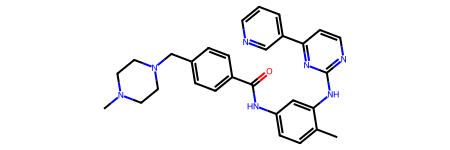

In [81]:
glvc = Chem.MolFromSmiles("CN1CCN(Cc2ccc(cc2)C(=O)Nc3ccc(C)c(Nc4nccc(n4)c5cccnc5)c3)CC1")
glvc

Get SMILES of Tylenol
*   From [Wikipedia](https://en.wikipedia.org/wiki/Paracetamol)

In [82]:
tylenol = Chem.MolFromSmiles("??")
tylenol

[22:28:38] SMILES Parse Error: syntax error while parsing: ??
[22:28:38] SMILES Parse Error: Failed parsing SMILES '??' for input: '??'


Read a set of molecules from an SD file

In [83]:
!wget https://raw.githubusercontent.com/francisacquah466/DSW2021-Intro-to-Cheminformatics-ML/main/example_compounds.sdf

--2024-11-25 22:28:38--  https://raw.githubusercontent.com/francisacquah466/DSW2021-Intro-to-Cheminformatics-ML/main/example_compounds.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152641 (149K) [text/plain]
Saving to: ‘example_compounds.sdf.1’

example_compounds.s 100%[===================>] 149.06K  --.-KB/s    in 0.02s   

2024-11-25 22:28:38 (6.15 MB/s) - ‘example_compounds.sdf.1’ saved [152641/152641]



Check the first 10 lines of the sd file

In [84]:
!head example_compounds.sdf

168691 CHEMBL318804
  -OEChem-08072111262D

 39 43  0     0  0  0  0  0  0999 V2000
    7.8251   -4.8028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.8727   -5.1079    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.5577   -6.0575    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5577   -6.0575    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2507   -5.1042    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.0612   -4.5156    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0


In [85]:
mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]

In [86]:
mols

Draw these molecules as a grid

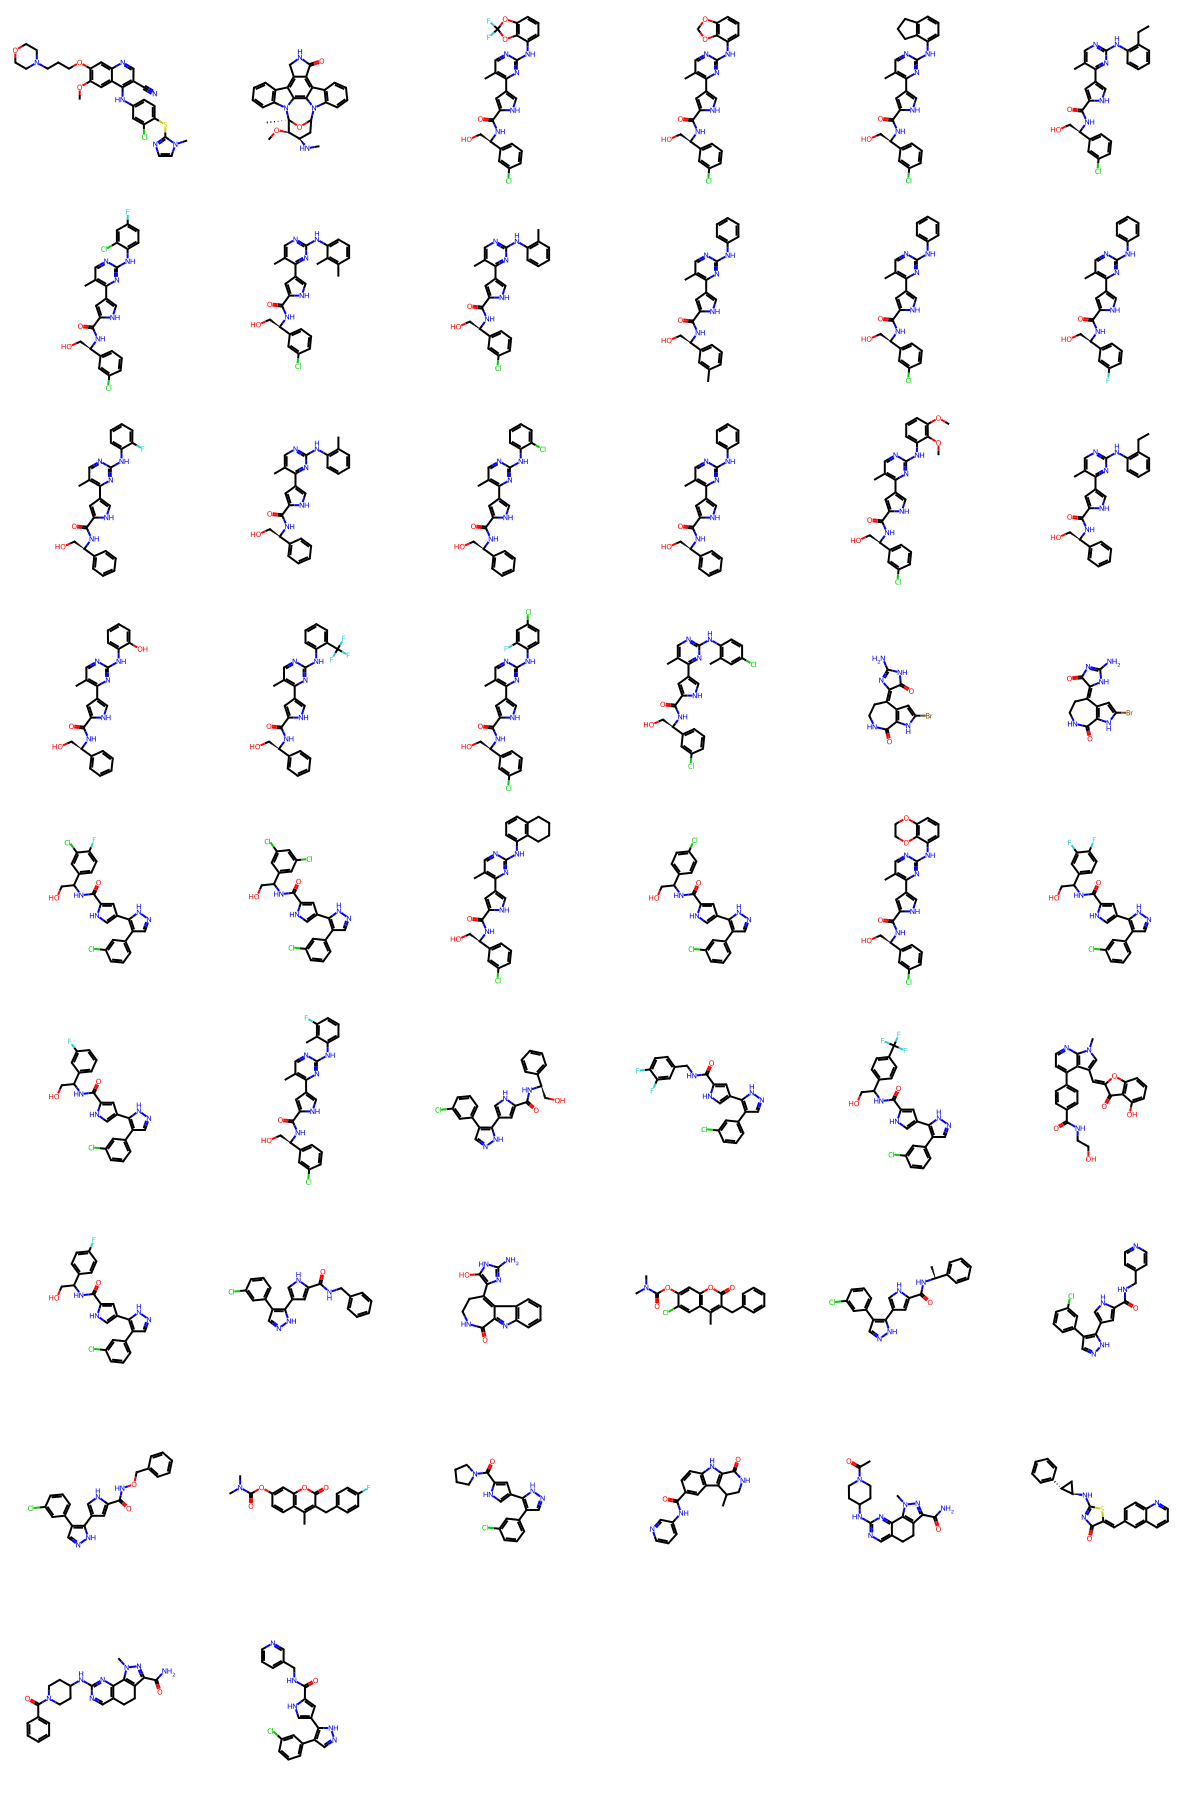

In [87]:
from rdkit import Chem
from rdkit.Chem import Draw # This line is missing in your original code

mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]

Draw.MolsToGridImage(mols, molsPerRow=6, useSVG=True)

We can use the mols2grid library to display molecules in a grid

In [88]:
!pip install mols2grid # Install mols2grid if you haven't already
import mols2grid # Import the mols2grid module

# Assuming 'mols' is a list of RDKit molecules
mols2grid.display(mols) # Now you can use the display function

MolGridWidget()

In [89]:
mols2grid.get_selection()

{}

We can also read an SD file into a Pandas dataframe.

In [90]:
from rdkit.Chem import PandasTools

df = PandasTools.LoadSDF("example_compounds.sdf")

Failed to patch pandas - unable to change molecule rendering


In [91]:
df.head()

,ID,ROMol
0,168691 CHEMBL318804,<rdkit.Chem.rdchem.Mol object at 0x7e63b25c7bc0>
1,86358 CHEMBL162,<rdkit.Chem.rdchem.Mol object at 0x7e63b25c7b50>
2,575087 CHEMBL576683,<rdkit.Chem.rdchem.Mol object at 0x7e63b25c7ae0>
3,575065 CHEMBL571484,<rdkit.Chem.rdchem.Mol object at 0x7e63b25c7a70>
4,575047 CHEMBL568937,<rdkit.Chem.rdchem.Mol object at 0x7e63b25c7a00>


Let's add columns with molecular weight and LogP to the dataframe.

In [92]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

In [93]:
df.head()

,ID,ROMol,MW,LogP
0,168691 CHEMBL318804,<rdkit.Chem.rdchem.Mol object at 0x7e63b25c7bc0>,565.099,5.49788
1,86358 CHEMBL162,<rdkit.Chem.rdchem.Mol object at 0x7e63b25c7b50>,466.541,4.35400
2,575087 CHEMBL576683,<rdkit.Chem.rdchem.Mol object at 0x7e63b25c7ae0>,527.915,4.96202
3,575065 CHEMBL571484,<rdkit.Chem.rdchem.Mol object at 0x7e63b25c7a70>,491.935,4.36922
4,575047 CHEMBL568937,<rdkit.Chem.rdchem.Mol object at 0x7e63b25c7a00>,487.991,5.12922


We can use a boxplot to examine the distribution of molecular weight within the dataframe.

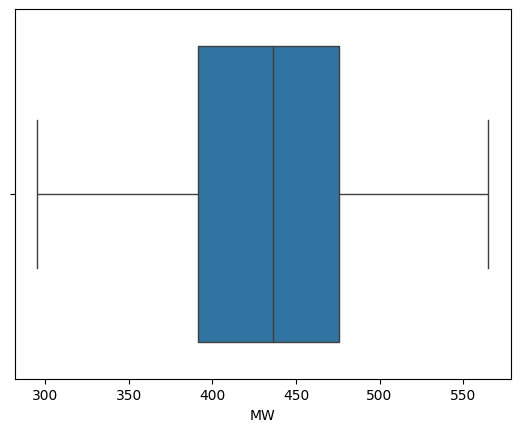

In [94]:
import seaborn as sns  # Import the seaborn library and assign it to the alias 'sns'
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'


df.head()

ax = sns.boxplot(x=df.MW)
plt.show() #Display the boxplot

## 2. **Building a Simple Decision Tree**

A simple function to calculate molecular weight, LogP, number of aromatic rings, number of hydrogen bond donors and acceptors from a SMILES

In [95]:
def calc_descriptors(smi):
    mol = Chem.MolFromSmiles(smi)
    if mol:
        mw, logp, num_arom_rings, hbd, hba = [x(mol) for x in [MolWt, MolLogP, NumAromaticRings, NumHDonors, NumHAcceptors]]
        res = [mw, logp, num_arom_rings, hbd, hba]
    else:
        res = [None] * 5
    return res

# Read Delaney's solubility dataset

The full paper can be found: [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x)

In [96]:
!wget https://raw.githubusercontent.com/francisacquah466/DSW2021-Intro-to-Cheminformatics-ML/main/delaney.csv

--2024-11-25 22:28:44--  https://raw.githubusercontent.com/francisacquah466/DSW2021-Intro-to-Cheminformatics-ML/main/delaney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60034 (59K) [text/plain]
Saving to: ‘delaney.csv.1’

delaney.csv.1       100%[===================>]  58.63K  --.-KB/s    in 0.01s   

2024-11-25 22:28:44 (5.86 MB/s) - ‘delaney.csv.1’ saved [60034/60034]



In [97]:
df = pd.read_csv("delaney.csv")

Get the dataframe column names

In [98]:
df.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [99]:
df.columns

Index(['Compound ID', 'measured log(solubility:mol/L)',
       'ESOL predicted log(solubility:mol/L)', 'SMILES'],
      dtype='object')

Change the name of column 1 to "LogS"

In [100]:
cols = list(df.columns)
cols[1] = 'LogS'
df.columns = cols

Add a new column "IsSol" to indicate whether a molecule's solubility is greater than 200uM


In [101]:
import math

df['IsSol'] = df.LogS > math.log10(200 * 1e-6)

In [102]:
df.head()

,Compound ID,LogS,ESOL predicted log(solubility:mol/L),SMILES,IsSol
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,True
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,True
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,True
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,True
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,True


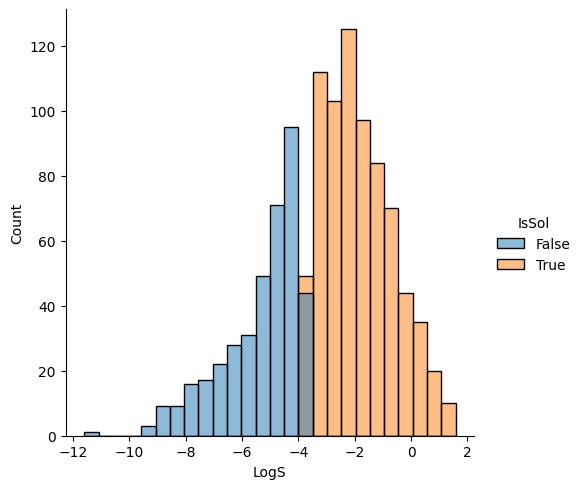

In [103]:
sns.displot(x='LogS',hue="IsSol",data=df)

Add the descriptors to the dataframe. Note that all of the descriptors are going into one column called "desc".

In [104]:
!pip install rdkit-pypi
import pandas as pd
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors

# Integrate tqdm with pandas
tqdm.pandas()

def calc_descriptors(smi):
    """
    Calculates molecular descriptors for a given SMILES string.

    Args:
        smi (str): The SMILES string representing the molecule.

    Returns:
        list: A list containing the calculated descriptors
              [molecular weight, logP, number of aromatic rings,
               number of hydrogen bond donors, number of hydrogen bond acceptors].
              Returns None if the SMILES string is invalid.
    """
    mol = Chem.MolFromSmiles(smi)
    if mol:
        # Use rdMolDescriptors.CalcNumAromaticRings instead of NumAromaticRings
        mw, logp, num_arom_rings, hbd, hba = [x(mol) for x in [Descriptors.MolWt, Descriptors.MolLogP, rdMolDescriptors.CalcNumAromaticRings, Descriptors.NumHDonors, Descriptors.NumHAcceptors]]
        res = [mw, logp, num_arom_rings, hbd, hba]
    else:
        res = None # Handle invalid SMILES
    return res

df['desc'] = df.SMILES.progress_apply(calc_descriptors) # Now progress_apply will be available with descriptors calculated

100%|██████████| 1144/1144 [00:00<00:00, 1200.59it/s]


In [105]:
df.head()

,Compound ID,LogS,ESOL predicted log(solubility:mol/L),SMILES,IsSol,desc
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,True,"[167.85, 2.5954000000000006, 0, 0, 0]"
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,True,"[133.405, 2.376500000000001, 0, 0, 0]"
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,True,"[167.85, 2.5938, 0, 0, 0]"
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,True,"[133.405, 2.0289, 0, 0, 0]"
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,True,"[187.37500000000003, 2.9189, 0, 0, 0]"


Split the descriptors into their on own columns.

In [106]:
desc_cols = ['MW','LogP','NumAromatic','HBD','HBA']
df[desc_cols] = df.desc.to_list()

In [107]:
df.head()

,Compound ID,LogS,ESOL predicted log(solubility:mol/L),SMILES,IsSol,desc,MW,LogP,NumAromatic,HBD,HBA
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,True,"[167.85, 2.5954000000000006, 0, 0, 0]",167.850,2.5954,0.0,0.0,0.0
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,True,"[133.405, 2.376500000000001, 0, 0, 0]",133.405,2.3765,0.0,0.0,0.0
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,True,"[167.85, 2.5938, 0, 0, 0]",167.850,2.5938,0.0,0.0,0.0
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,True,"[133.405, 2.0289, 0, 0, 0]",133.405,2.0289,0.0,0.0,0.0
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,True,"[187.37500000000003, 2.9189, 0, 0, 0]",187.375,2.9189,0.0,0.0,0.0


Split the data into training and test sets.

In [108]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

# Now you can use train_test_split
train, test = train_test_split(df)

In [109]:
train.shape, test.shape

((858, 11), (286, 11))

Look again at the X variables

In [110]:
desc_cols

['MW', 'LogP', 'NumAromatic', 'HBD', 'HBA']

Split the training and test sets into X and y variables.

In [111]:
train_X = train[desc_cols]
train_y = train.IsSol
test_X = test[desc_cols]
test_y = test.IsSol


Create and train a classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier # Import the DecisionTreeClassifier class from sklearn.tree

cls = DecisionTreeClassifier(max_depth=2) # Now you can use DecisionTreeClassifier
cls.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=2)


Predict on the test set

In [113]:
from sklearn.tree import DecisionTreeClassifier # Import the DecisionTreeClassifier class from sklearn.tree
from sklearn.metrics import roc_auc_score # Import roc_auc_score

cls = DecisionTreeClassifier(max_depth=2) # Now you can use DecisionTreeClassifier
cls.fit(train_X,train_y)

pred = cls.predict(test_X)
auc = roc_auc_score(test_y, pred) # Now roc_auc_score is defined and can be used
print(f"ROC AUC = {auc:.2f}")

ROC AUC = 0.83


Plot a confusion matrix to show the classifier performance

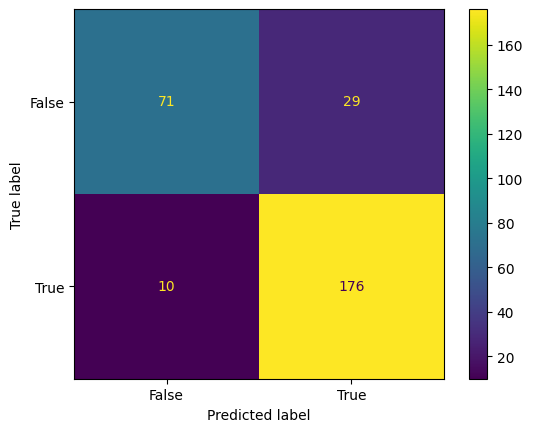

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'cls', 'test_X', and 'test_y' are already defined

# Generate the confusion matrix
cm = confusion_matrix(test_y, cls.predict(test_X))

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
disp.plot()
plt.show()

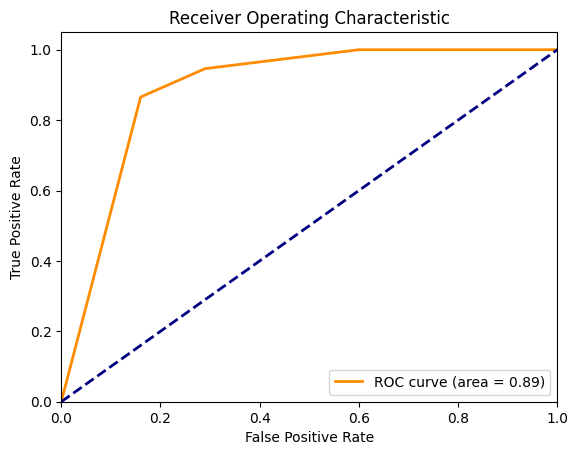

In [115]:
# prompt: Plot an ROC cure to show the classifier performance

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from rdkit.Chem import Descriptors, rdMolDescriptors


# ... (Your existing code) ...


# Predict probabilities instead of classes
pred_proba = cls.predict_proba(test_X)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Plot an ROC cure to show the classifier performance

Can the classifier be used to classify new molecules as soluble or not??

In [116]:
# prompt: Can the classifier be used to classify new molecules as soluble or not?? IF YES write code to run here

from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import math

# Assuming 'df' is your DataFrame with 'desc_cols' and 'IsSol' defined
# and the classifier 'cls' is trained as shown in the original code.


def predict_solubility(smiles):
    """
    Predicts the solubility of a molecule given its SMILES string.

    Args:
      smiles: SMILES string representing the molecule.

    Returns:
      A tuple containing the predicted solubility (True for soluble, False for insoluble)
      and the probability of solubility. Returns None if the SMILES is invalid or descriptor calculation fails.
    """
    descriptors = calc_descriptors(smiles)
    if descriptors is None:
        return None

    try:
      # Ensure descriptors are in a format compatible with the classifier
      input_data = pd.DataFrame([descriptors], columns=desc_cols)
      prediction = cls.predict(input_data)[0]
      probability = cls.predict_proba(input_data)[0,1]
      return prediction, probability
    except Exception as e:
      print(f"Error during prediction: {e}")
      return None

# Example usage:
smiles_to_predict = "CC(=O)Oc1ccccc1C(=O)O" # Example SMILES string
result = predict_solubility(smiles_to_predict)

if result:
  prediction, probability = result
  print(f"The molecule with SMILES '{smiles_to_predict}' is predicted to be {'soluble' if prediction else 'insoluble'}.")
  print(f"Probability of solubility: {probability:.4f}")
else:
  print(f"Could not predict the solubility for the SMILES '{smiles_to_predict}'.")



The molecule with SMILES 'CC(=O)Oc1ccccc1C(=O)O' is predicted to be soluble.
Probability of solubility: 0.9407


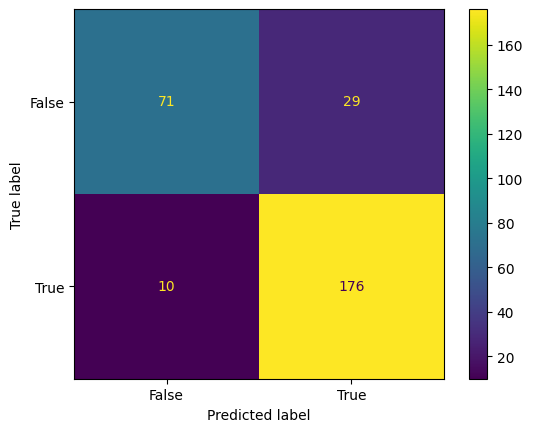

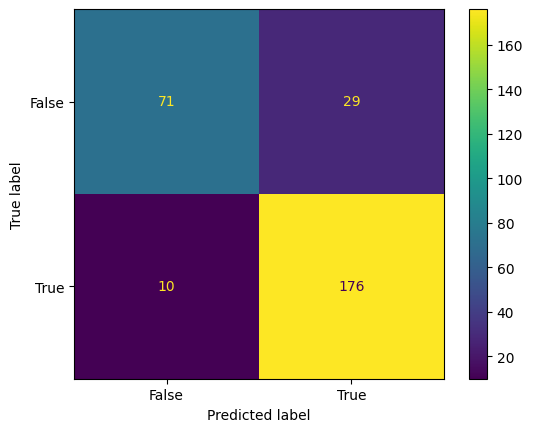

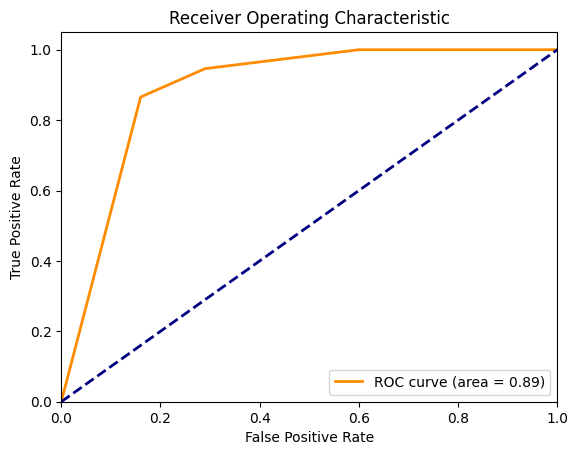

In [117]:
# Replace 'plot_confusion_matrix' with 'ConfusionMatrixDisplay.from_estimator'
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix, roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay # Original line causing the error
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay # Updated line to remove the deprecated function
from sklearn.model_selection import train_test_split
from rdkit.Chem import Descriptors, rdMolDescriptors
from rdkit.Chem import Draw

# Assuming 'cls', 'test_X', and 'test_y' are already defined and the model is trained
# ... (Your existing code for model training) ...

# Instead of plot_confusion_matrix:
cm_display = ConfusionMatrixDisplay.from_estimator(cls, test_X, test_y) # Use ConfusionMatrixDisplay to create the plot
cm_display.plot() # This will plot the confusion matrix

plt.show()

# Predict probabilities instead of classes
pred_proba = cls.predict_proba(test_X)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [118]:
df.head()

,Compound ID,LogS,ESOL predicted log(solubility:mol/L),SMILES,IsSol,desc,MW,LogP,NumAromatic,HBD,HBA
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,True,"[167.85, 2.5954000000000006, 0, 0, 0]",167.850,2.5954,0.0,0.0,0.0
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,True,"[133.405, 2.376500000000001, 0, 0, 0]",133.405,2.3765,0.0,0.0,0.0
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,True,"[167.85, 2.5938, 0, 0, 0]",167.850,2.5938,0.0,0.0,0.0
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,True,"[133.405, 2.0289, 0, 0, 0]",133.405,2.0289,0.0,0.0,0.0
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,True,"[187.37500000000003, 2.9189, 0, 0, 0]",187.375,2.9189,0.0,0.0,0.0


In [119]:
len(df)

1144

# **References**

1. [Pat Walters Github](https://github.com/PatWalters/chem_tutorial)
2. [Data Professor YouTube](https://www.youtube.com/c/DataProfessor)
3. [Deep Learning for the Life Sciences](https://www.oreilly.com/library/view/deep-learning-for/9781492039822/)
4.[ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x)